<a href="https://colab.research.google.com/github/k-u-s-h-a-g-r-a-k-e-d-i-a/AI-ML-Basics/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXP:6


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/clv_data.csv')
print("Dataset successfully imported")

Dataset successfully imported


In [ ]:
a,b= df.shape
print("Number of rows :",a)
print("Number of columns:",b)

Number of rows : 5000
Number of columns: 8


2587
Unnamed: 0           0.00
id                   0.00
age                 48.92
gender               0.00
income               0.00
days_on_platform     2.82
city                 0.00
purchases            0.00
dtype: float64


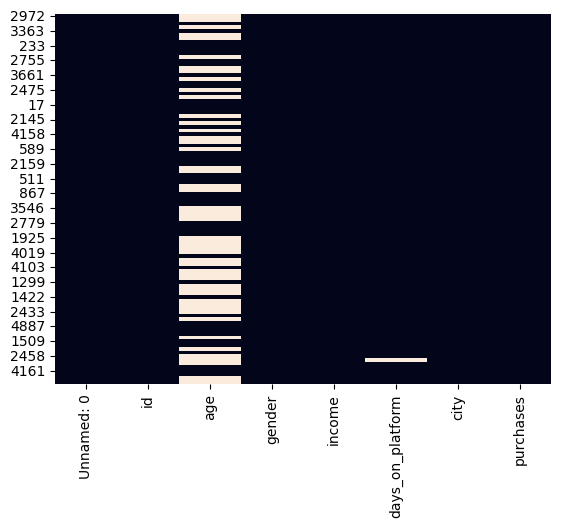

In [ ]:

print(df.isnull().sum().sum())
sns.heatmap(df.isnull(), cbar = False)
plt.show()

In [ ]:
for column in df.select_dtypes(include=np.number): #Can be removed to edit the original dataset (not recommended)
    df[column].fillna(df[column].mean(), inplace=True)


/tmp/ipython-input-3525119002.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [ ]:
# # for column in df.select_dtypes(include = np.number):
# #   df[column].fillna(df[column].median(), inplace=True)


/tmp/ipython-input-3588514728.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [ ]:
for column in df.select_dtypes(exclude = np.number):
  df[column].fillna(df[column].mode()[0], inplace=True)

/tmp/ipython-input-4159637928.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [ ]:
def outliers(df):
    outliers={}
    for column in df.select_dtypes(include=np.number):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        outliers[column] = df[(df[column] < lower) | (df[column] > upper)][column]
    return outliers
outliers = outliers(df)
print("\nOutliers detected:")
for col, values in outliers.items():
    print(f"{col}: {len(values)} outliers")


Outliers detected:
Unnamed: 0: 0 outliers
id: 0 outliers
age: 2345 outliers
income: 77 outliers
days_on_platform: 104 outliers
purchases: 10 outliers


In [ ]:
non_numerical_cols = df.select_dtypes(exclude=np.number).columns
print("Non-numerical columns:", non_numerical_cols.tolist())

print("\nInfrequent categories (potential outliers) in non-numerical columns:")
for col in non_numerical_cols:
    value_counts = df[col].value_counts(normalize=True) * 100
    infrequent_threshold = 1.0
    infrequent_categories = value_counts[value_counts < infrequent_threshold]

    if not infrequent_categories.empty:
        print(f"\nColumn: {col}")
        print(infrequent_categories)
    else:
        print(f"\nColumn: {col} - No categories below {infrequent_threshold}% frequency.")

Non-numerical columns: ['gender', 'city']

Infrequent categories (potential outliers) in non-numerical columns:

Column: gender - No categories below 1.0% frequency.

Column: city - No categories below 1.0% frequency.
